# Centrality Measures

## Degree Centrality

The degree centrality or valence of a vertex *v* is the number of edges connected to *v*. Alternatively stated, in an unweighted and undirected graph it is simply the number of neighbors of *v* or the number of vertices of distance 1 from *v*


Related to degree centrality is *ego size*. The *n*-th order *ego network* of a given vertex *v* is a set including *v* itself and all vertices of distance at most *n* from *v*. The *n*-th order *ego size* is the number of vertices in the *n*-th order ego network. 

Degree centrality is a measure of immediate connection in a network. It could be interpreted as immediate reach in a social network. Its precise interpretation depends strongly on the nature of the connection. In a network of academic co-authoring, someone with high degree centrality has collaborated directly with a larger number of other academics. 

## Closeness Centrality

The closeness centrality of a vertex v in a connected graph is the inverse of the sum of the distances from v to all other vertices. 

the vertex with the highest closeness centrality will be the most efficient in reaching all the other vertices in the graph.

Closeness centrality is a measure of how efficiently the entire graph can be traversed from a given vertex. This is particularly valuable in the study of information flow. In social networks, information shared by those with high closeness centrality will likely reach the entire network more efficiently. 

## Betweenness Centrality

The betweenness centrality of a vertex 
v is calculated by taking each pair of other vertices 
x
 and 
y
, calculating the number of shortest paths between 
x
 and 
y
 that go through 
v
, dividing by the total number of shortest paths between 
x
 and 
y
, then summing over all such pairs of vertices in the graph. 

Betweenness centrality is a measure of how important a given vertex is in connecting other pairs of vertices in the graph. 



In people networks, individuals with higher betweenness centrality can be regarded as playing important roles in ensuring overall connectivity of the network, and if they are removed from the network the risks of overall disconnection are higher. This has strong applications in studying the effects of departures from organizations.

## Eigenvector centrality

The **Eigenvector centrality** or **relative centrality** or **prestige** of a vertex is a measure of how connected the vertex is to other influential vertices. It is impossible to define this without a little linear algebra.



Vertices can have high influence through being connected to a lot of other vertices with low influence, or through being connected to a small number of highly influential vertices.

In directed graphs, eigenvector centrality gives rise to interesting measures of different types of influence. For example, imagine a citation network where certain authors are regularly citing a lot of influential articles. These authors are known as *hubs*, and their *outgoing eigenvector centrality* will be high. *Hub score* is the *outgoing eigenvector centrality* of a vertex. Meanwhile, authors who have high *incoming eigenvector centrality* will be frequently referenced by hubs, and these authors are known as *authorities*. *Authority score* is the *incoming eigenvector centrality* of a vertex. These types of measures are becoming increasingly adopted in fields such as bibliometrics. Note that in undirected graphs the hub score, authority score and eigenvector centrality of vertices are identical.



## Edge weights in Centrality

it is unusual to consider edge weights in centrality measures. Nonetheless, most centrality measures do have approaches to consider edge weights, and this is a topic of ongoing research. Usually in these situations, edge weights are transformed to be cost functions—for example by inverting them—so that edges with higher weights are considered ‘preferable’ in graph traversal. 

# Code

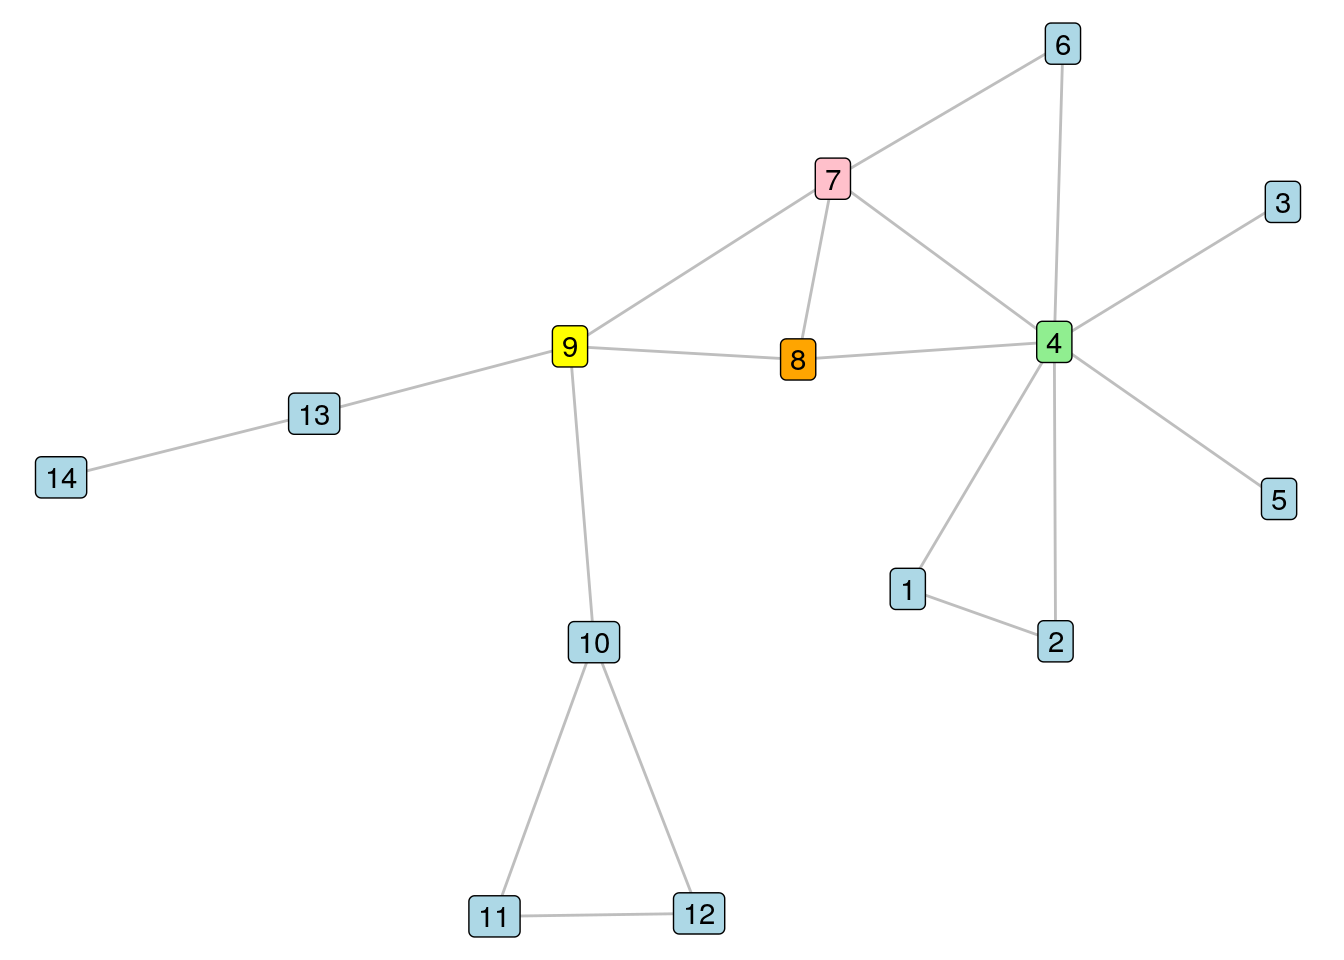

In [1]:
import networkx as nx
import pandas as pd

# download edgelist and remove weights
g14_edgelist = pd.read_csv(
  "https://ona-book.org/data/g14_edgelist.csv"
)
g14_undirected = g14_edgelist.drop('weight', axis = 1)

# create undirected g14 graph
g14 = nx.from_pandas_edgelist(g14_undirected, source = 'from', 
target = 'to')

# calculate degree centrality of Vertices 4 and 9
nx.degree(g14, [4, 9])

DegreeView({4: 7, 9: 4})

There are also methods called `degree() `for a `Graph()` object as well as `in_degree()` and `out_degree()` for `DiGraph()` objects in networkx.

The ego network of a vertex can be obtained using the `ego_graph()` function.

In [2]:
ego_4_2 = nx.ego_graph(g14, n = 4, radius = 2)
ego_4_2.nodes

NodeView((9, 8, 7, 4, 6, 1, 2, 3, 5))

Closeness centrality is calculated using the closeness_centrality() function. However, in networkx this is normalized by multiplying the result by 
n
−
1
 where 
n
 is the number of vertices in the graph. To obtain non-normalized closeness centrality, it will be necessary to divide the output of this function by 
n
−
1


In [3]:
# get non-normalized closeness centrality for Vertex 7
norm_closeness = nx.closeness_centrality(g14, 7)
norm_closeness/(len(g14.nodes) - 1)

0.04

Betweenness centrality is calculated using the betweenness_centrality() function. Again this is normalized by default but this can be set to False in the arguments.

In [4]:
# get non-normalized betweenness centrality for Vertex 9
between = nx.betweenness_centrality(g14, normalized = False)
between.get(9)

46.0

Finally, eigenvector centrality is calculated using the eigenvector_centrality() function, with a dict returned similar to betweenness_centrality().

In [5]:
eigen = nx.eigenvector_centrality(g14)
eigen.get(4)

0.5503779695532801

Closeness, betweenness and eigenvector centrality are calculated using incoming edges in networkx digraphs. To calculate the outgoing equivalent, simply use the reverse() method on the digraph to make all outgoing edges incoming and vice versa.



## Percolation Centrality

A ‘contagion’ spreads over the links of a complex network, altering the ‘states’ of the nodes as it spreads, either recoverably or otherwise. For example, in an epidemiological scenario, individuals go from ‘susceptible’ to ‘infected’ state as the infection spreads. 

The Percolation Centrality is defined for a given node, at a given time, as the proportion of ‘percolated paths’ that go through that node. A ‘percolated path’ is a shortest path between a pair of nodes, where the source node is percolated (e.g., infected). The target node can be percolated or non-percolated, or in a partially percolated state.



# Example Use Case

In this section we will reprise the workfrance unweighted graph from the previous chapter and will use it to illustrate some common uses for centrality measures. First, we will look at how to find network-wide and department level ‘superconnectors’, then we will look at how to find potential socially influential actors in a network. Let’s load up the workfrance graph again.



In [6]:
import pandas as pd
import networkx as nx

# download workfrance data sets
workfrance_edges = pd.read_csv(
    "https://ona-book.org/data/workfrance_edgelist.csv"
)
workfrance_vertices = pd.read_csv(
    "https://ona-book.org/data/workfrance_vertices.csv"
)

workfrance = nx.from_pandas_edgelist(workfrance_edges, source = "from", 
target = "to", edge_attr = True)

dept_attr = workfrance_vertices.set_index('id').to_dict(orient = 'index')
nx.set_node_attributes(G = workfrance, values = dept_attr)

## Finding 'superconnectors’

Individuals with high betweenness centrality in people networks could be regarded as ‘superconnectors’.

Superconnectors can play very valuable roles in the social integration of new entrants to the network, and they can also present greater risk of connective disruption if they leave the network.

Imagine a new hire is about to join the DMI department in our workfrance network. We want to assign two ‘buddies’ to this individual to help them socially integrate into the workplace more effectively. Given that it is important for the individual to assimilate into their own department and into the workplace as a whole, we want to select the best two current employees to assist with both goals. Let’s start with the DMI department first.



In order to study the DMI department as a self-contained network, we will create an induced subgraph which contains only those in that department and the connections between them, and visualize this network

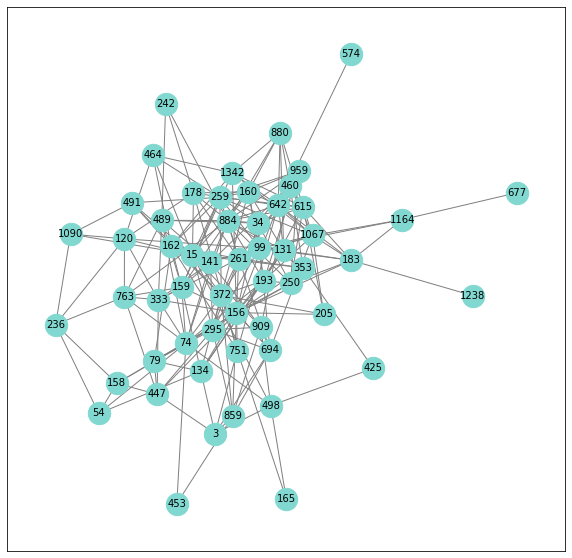

In [7]:
DMI_only = [i for i in workfrance.nodes if workfrance.nodes[i]['dept'] == "DMI"]
subgraph = workfrance.subgraph(DMI_only)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

main_draw = nx.draw_networkx(subgraph,
                             font_size = 10,
                             node_size = 500,
                             node_shape = 'o',
                             node_color = '#81d8d0',
                             edge_color = 'grey')

Now we are interested in those who have the strongest role in connecting others in this network. Let’s find the top three individuals in terms of betweenness centrality.



In [8]:
dict_betweenness = nx.betweenness_centrality(subgraph, normalized = False)
tup_top3betweenness = sorted(dict_betweenness.items(), key = lambda item:item[1], reverse = True)[0:3]
id_top3betweenness = [i for i,j in tup_top3betweenness]
id_top3betweenness

[156, 74, 884]

These are the IDs of the top three superconnectors in the DMI department. Now we can visualize the graph again, but let’s adjust vertex size by betweenness and color the top 3 superconnectors.




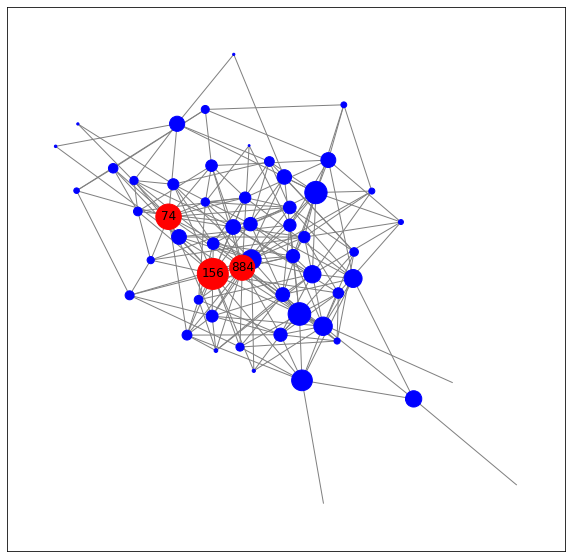

In [9]:
import matplotlib.pyplot as plt

node_color = ['red' if i in id_top3betweenness else 'blue' 
              for i in subgraph.nodes]
node_size = [j*5 for i,j in dict_betweenness.items()]
node_label = {j:i if i in id_top3betweenness else '' 
              for i,j in zip(subgraph.nodes, subgraph.nodes)}

plt.figure(figsize=(10,10))

main_draw = nx.draw_networkx(subgraph,
                             font_size = 12,
                             node_size = node_size,
                             labels = node_label,
                             node_shape = 'o',
                             node_color = node_color,
                             edge_color = 'grey')

In a similar way, we can find the superconnectors of the overall workfrance network.



In [10]:
dict_betweenness = nx.betweenness_centrality(workfrance, normalized = False)
tup_top3betweenness = sorted(dict_betweenness.items(), 
                             key = lambda item:item[1], reverse = True)[0:3]
id_top3betweenness = [i for i,j in tup_top3betweenness]
id_top3betweenness

[603, 99, 322]

In [11]:
list(set([workfrance.nodes[i]['dept'] for i in workfrance.nodes]))

['SRH',
 'SCOM',
 'SFLE',
 'DMCT',
 'SDOC',
 'DSE',
 'DISQ',
 'DG',
 'SSI',
 'DST',
 'DMI',
 'DCAR']

In [19]:
import random

unique_depts = list(set([workfrance.nodes[i]['dept'] 
                         for i in workfrance.nodes]))

colors = {}

for i in range(len(unique_depts)):
  color = ''
  color = ["#"+''.join([random.choice('ABCDEF0123456789') 
           for i in range(6)])]
  colors[unique_depts[i]] = color[0]

colors

{'DCAR': '#80CE4A',
 'DG': '#32D684',
 'DISQ': '#6113C7',
 'DMCT': '#8EFD2F',
 'DMI': '#B451E5',
 'DSE': '#D68911',
 'DST': '#ECC39A',
 'SCOM': '#A01440',
 'SDOC': '#D9F73A',
 'SFLE': '#0814EE',
 'SRH': '#51E6B8',
 'SSI': '#9C1DD6'}

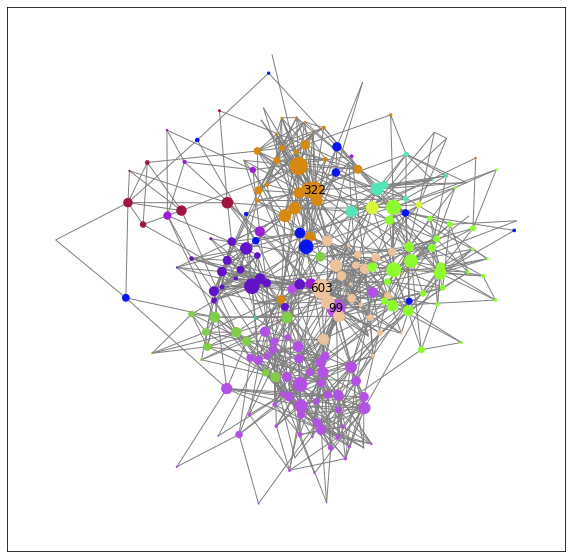

In [20]:
node_color = [colors.get(workfrance.nodes[i]['dept']) for i in workfrance.nodes]
node_size = [j for i,j in dict_betweenness.items()]
node_label = {j:i if i in id_top3betweenness else '' 
              for i,j in zip(workfrance.nodes, workfrance.nodes)}

plt.figure(figsize=(10,10))

main_draw = nx.draw_networkx(workfrance,
                             font_size = 12,
                             node_size = node_size,
                             labels = node_label,
                             node_shape = '.',
                             node_color = node_color,
                             edge_color = 'grey')

We can see upon examination that our top 3 organization-wide superconnectors are all in different departments. Putting all this together, it would seem that a good choice of buddies for the new hire would be employee 156 for departmental integration and employee 603 for office-wide integration, although any combination of the six individuals identified through this analysis would probably be decent choices.



## Identifying influential employees

Influential actors in a network can be very useful to identify. In organizational contexts, working with more influential employees can make a difference to how certain initiatives or changes can be perceived by other employees. Influential employees can also be useful in efficiently tapping into prevalent opinions across the entire employee population. Imagine that we want to identify individuals from across the organization to participate in important workshops to problem solve some critical operational initiatives. These initiatives will affect employees at both an overall and a department level; therefore, it would be ideal to have individuals who are influential within each department as well as across the entire organization.



Again, let’s look at a single department—the DMI department—as an example. Because we are interested in overall influence, this could mean we are equally interested in employees with a lot of connections or employees who are ‘stealthily’ influential in being connected to a smaller number of other highly connected employees. The best measure for this is eigenvector centrality.



First we identify the top three most influential individuals in the DMI department as measured by eigenvector centrality by working on the DMI subgraph.



In [14]:
dict_eigenvector = nx.eigenvector_centrality(subgraph)
tup_top3eigenvector = sorted(dict_eigenvector.items(), 
                             key = lambda item:item[1], reverse = True)[0:3]
id_top3eigenvector = [i for i,j in tup_top3eigenvector]
id_top3eigenvector

[884, 156, 642]

We see two employee IDs that are in common with our top 3 superconnectors. We can also identify the top 3 most influential individuals across the workfrance graph according to their eigenvector centrality.



In [17]:
dict_eigenvector = nx.eigenvector_centrality(workfrance)
tup_top3eigenvector = sorted(dict_eigenvector.items(), 
                             key = lambda item:item[1], reverse = True)[0:3]
id_top3eigenvector = [i for i,j in tup_top3eigenvector]
id_top3eigenvector

[603, 649, 147]

We see one individual in common with our top 3 superconnectors. Let’s visualize this network so we can identify the department mix of our top 3 most influential individuals.

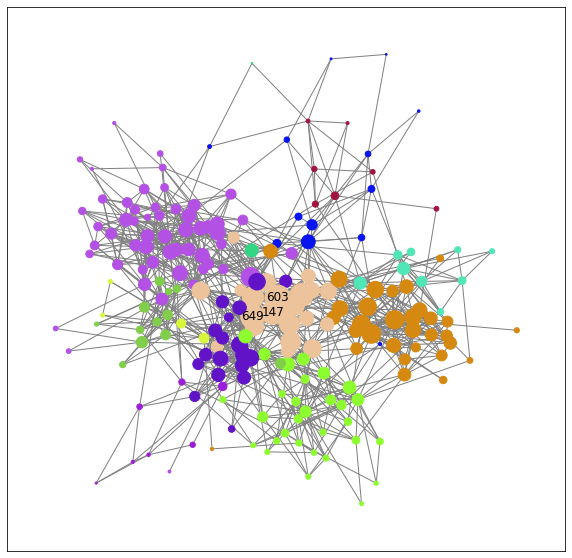

In [28]:
node_color = [colors.get(workfrance.nodes[i]['dept']) for i in workfrance.nodes]
node_size = [j * 10000 for i,j in dict_eigenvector.items()]
node_label = {j:i if i in id_top3eigenvector else '' 
              for i,j in zip(workfrance.nodes, workfrance.nodes)}

plt.figure(figsize=(10,10))

main_draw = nx.draw_networkx(workfrance,
                             font_size = 12,
                             node_size = node_size,
                             labels = node_label,
                             node_shape = '.',
                             node_color = node_color,
                             edge_color = 'grey')

This time we see that our three most influential individuals are all in the same department, suggesting that this department may be a strategically important one to involve in any planned change initiatives.